# 1. Perkenalan

Nama : Aditya Vianseto<br>
Dataset : IDMB Movie Ratings<br>
Objective : Create NLP Model For Sentiment Analysis From Movie Reviews 

URL Dataset :<br>
https://www.kaggle.com/datasets/yasserh/imdb-movie-ratings-sentiment-analysis?resource=download

# 2. Import Libraries

In [1]:
# Import Libraries

import string
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM, GRU, BatchNormalization, Dropout, TextVectorization, Embedding
from tensorflow.keras.models import Sequential
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\62877\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\62877\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\62877\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Melakukan Import Library yang akan digunakan pada penelitian ini

# 3. Data Loading

In [2]:
# Load Dataset
raw_data = pd.read_csv('movie.csv')

Melakukan load dataset dari file `Wholesale customers data.csv` dan memasukannya kedalam variabel `raw_data`

In [3]:
# Display All Columns of Data Frame Without Limitation
pd.set_option('max_columns', None)

# Display First Row of Dataset
print('=============== First Rows of Dataset ===============')
display(raw_data.head())

# Display Las Row of Dataset
print('================= Last Rows of Dataset =================')
display(raw_data.tail())

=============== First Rows of Dataset ===============


,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


================= Last Rows of Dataset =================


,text,label
39995,"""Western Union"" is something of a forgotten cl...",1
39996,This movie is an incredible piece of work. It ...,1
39997,My wife and I watched this movie because we pl...,0
39998,"When I first watched Flatliners, I was amazed....",1
39999,"Why would this film be so good, but only gross...",1


Menampilkan data teratas dan terbawah dari dataset yang digunakan

In [4]:
# Check Dataset Info
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


Berdasarkan info diatas dari dataset yang digunakan dapat diketahui bahwa:
- Terdapat `40000` entri data review dan terdapat `2` kolom
- Tidak ada `Missing Values`
- `Data Type` sudah sesuai

In [5]:
# Check duplicate values
raw_data[raw_data.duplicated()]

,text,label
2164,"I find it rather useless to comment on this ""m...",0
3236,An absolutely atrocious adaptation of the wond...,0
3428,When I first saw this film it was not an impre...,0
3652,Before I watched this tv movie I did not know ...,1
3787,What a clunker!<br /><br />It MUST have been m...,0
...,...,...
39229,I Enjoyed Watching This Well Acted Movie Very ...,1
39246,You do realize that you've been watching the E...,0
39508,(Spoilers)<br /><br />Oh sure it's based on Mo...,0
39681,It's been a long time since I last saw a movie...,0


Setelah melakukan pengecekan duplikasi data, terdapat `277` baris data yang merupakan duplicate values

In [6]:
# Check Duplicated Value Based on Index 2164 From the Dataframe Above 
raw_data[raw_data.text==raw_data.text[2164]]

,text,label
1681,"I find it rather useless to comment on this ""m...",0
2164,"I find it rather useless to comment on this ""m...",0


Setelah melakukan pengecekan lebih mendalam terhadap data yang memiliki value sama dengan data pada index `2164`, ternyata memang benar adanya duplikasi data

In [7]:
# Duplicate Data Before do Any Change on Dataset
backup_data = raw_data.copy()

# Drop Data With Empty String on TotalCharges
raw_data.drop_duplicates(inplace=True)

# Re-Check duplicate values
print("Similar Values on Dataset after drop Duplicates: ",raw_data.duplicated().sum())

Similar Values on Dataset after drop Duplicates:  0


Sebelum melakukan penghapusan terhadap duplicate values dilakukan pencadangan terhadap data asli pada sebuah variabel `backup_data`. Duplicate values berhasil dihilangkan dari dataset setelah melakukan penghapusan duplicate values dan melakukan pengecekan ulang

In [8]:
# Check Empty String on Dataset
print('Empty String (" " or "") on Dataset :',len(raw_data[(raw_data.text==" ") | (raw_data.text=="")]))

Empty String (" " or "") on Dataset : 0


Berdasarkan hasil diatas, dapat diketahui bahwa tidak terdapat `empty string` pada dataset

# 4.Exploratory Data Analysis (EDA)

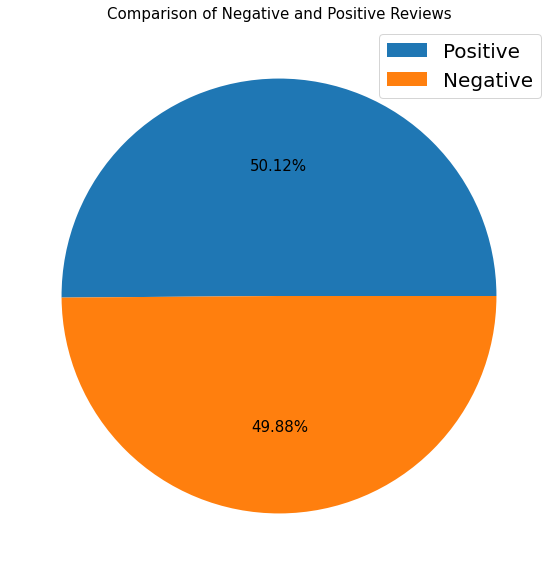

Positive Review Count : 19908
Negative Review Count : 19815


In [9]:
# Comparison of Negative and Positive Reviews
raw_data.label.value_counts().plot(kind='pie', labels=['',''], autopct='%.2f%%', figsize=[10,10], fontsize=15, )
plt.title('Comparison of Negative and Positive Reviews', fontsize=15)
plt.ylabel('')
plt.legend(labels=['Positive','Negative'], fontsize=20, loc='best')
plt.show()
print('=============================')
print('Positive Review Count :',raw_data.label.value_counts(0)[1])
print('Negative Review Count :',raw_data.label.value_counts(0)[0])

Berdasarkan hasil perbandingan diatas dapat diketahui bahwa jumlah review yang berlabelkan positif dan negatif dapat dinyatakan seimbang, namun untuk review positif memiliki jumlah yang lebih banyak dibandingkan review negatif dimana jumlah review positif sebanyak `19908` (`50.12%`) dan review negatif sebanyak `19815` (`49.88%`) dengan selisih jumlah sebesar `0.24%`

In [10]:
from nltk.corpus import stopwords
nltk.download('stopwords')
# Convert All Reviews, Positive Reviews, and Negative Reviews Into One String Variable
all_review = ' '.join (list(raw_data.text.values))
positive = ' '.join (list(raw_data[raw_data.label==1].text.values))
negative = ' '.join (list(raw_data[raw_data.label==0].text.values))

# Define WordCloud to Check Common Words from Dataset
wc = WordCloud(
    background_color='white',
    max_words=10000,
    stopwords=set(stopwords.words('english'))
)

# Define Function to Plot WordCloud
def wc_plot(text,title):
    plt.figure(figsize=(10,5))
    plt.imshow(wc.generate(text), interpolation='bilinear')
    plt.axis('off')
    plt.title(f'{title}', fontsize=15)
    plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\62877\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


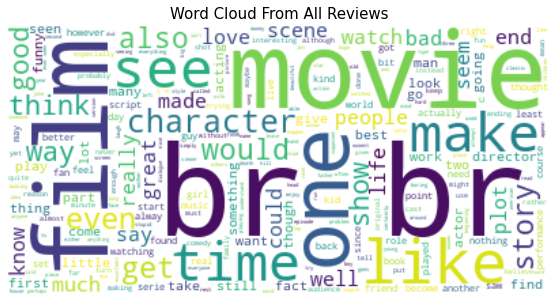

In [11]:
# Word Cloud of All Reviews
wc_plot(all_review.lower(),'Word Cloud From All Reviews')

Berdasarkan WordCloud diatas untuk seluruh review pada dataset, dapat disimpulkan bahwa kata `film` dan `movie` merupakan sebuah kata yang sering disebutkan pada kalimat review pada dataset dimana dua kata tersebut memiliki makna yang sama, hal ini dikarenakan memang dataset merupakan kumpulan revew dari sebuah film. Kata `br` juga sering disebutkan, namun `br` merupakan sebuah tag untuk mendefinisikan `New Line` dimana hal ini hanya memberikan informasi bahwa terdapat tag `br` dalam bentuk text pada `dokumen`. Selain hal diatas terdapat sebuah kata yang cukup sering disebutkan dan menarik yaitu `character` dan `story`, dapat diasumsikan bahwa sebagian besar review memberikan tanggapan terhadap `character` dan `story` pada film tersebut

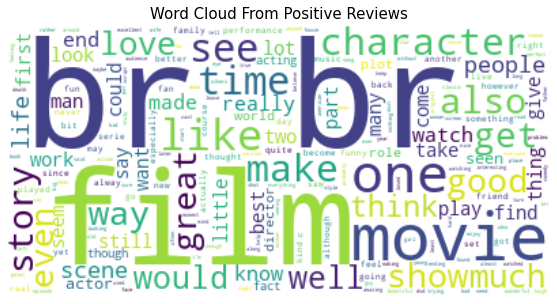

In [12]:
# Word Cloud of Positive Reviews
wc_plot(positive.lower(),'Word Cloud From Positive Reviews')

Berdasarkan WordCloud diatas untuk seluruh review positif pada dataset, dapat disimpulkan bahwa terdapat beberapa kata yang menunjukan kesan positif pada review dan cukup sering disebutkan seperti `good`, `great`, `love`, `like`, `best`, dan `well`. Kata `character` dan `story` juga cukup disebutkan pada sekumpulan review positif ini, sehingga dapat diasumsikan bahwa dari segi karakter dan jalan cerita film tersebut lah yang membuat para penonton memberikan review yang positif

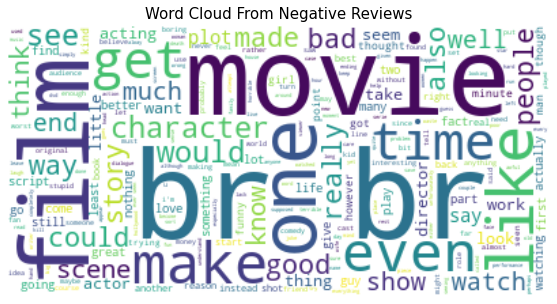

In [13]:
# Word Cloud of Negative Reviews
wc_plot(negative.lower(),'Word Cloud From Negative Reviews')

Berdasarkan WordCloud diatas untuk seluruh review negatif pada dataset, dapat disimpulkan bahwa terdapat sebuah kata yang menunjukan kesan negatif pada review dan cukup sering disebutkan yaitu `bad`. Kata `character` dan `story` ternyata juga cukup disebutkan pada sekumpulan review negatif ini, sehingga dapat diasumsikan bahwa dari segi karakter dan jalan cerita film juga yang membuat para penonton memberikan review yang negatif, penyebab lain dari terdapatnya kesamaan ini dikarenakan jumlah review positif dan review negatif yang cukup seimbang, namun dalam sekumpulan review negatif yang diberikan terdapat kata `good` sehingga dapat diasumsikan bahwa cukup banyak yang memberikan kritikan dan review negatif terhadap film tersebut, namun tetap memberikan hal baik yang terdapat pada film tersebut.

# 5. Data Preprocessing

## 5.1. Split Data For Inference

In [14]:
# Get Data for Model Inference
data_inference = raw_data.sample(5, random_state=27)
data_inference

,text,label
21102,*WARNING* Spoilers ahead... The writers of thi...,1
25391,Let me break down this film for you...<br /><b...,0
36867,This Movie Is Excellent The passion between Ja...,1
38531,"The jokes are obvious, the gags are corny, and...",1
30803,"This film, once sensational for its forward-th...",0


Membuat data inferensi untuk mengecek apakah model dapat melakukan prediksi menggunakan data baru. Data inferensi mengambil sejumlah 5 sampel data yang didapatkan secara acak dari dataset yang digunakan

In [15]:
# Remove Inference-Set from Dataset
data_train_test = raw_data.drop(index=data_inference.index)
data_train_test.reset_index(drop=True, inplace=True)
data_inference.reset_index(drop=True, inplace=True)
data_train_test

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
...,...,...
39713,"""Western Union"" is something of a forgotten cl...",1
39714,This movie is an incredible piece of work. It ...,1
39715,My wife and I watched this movie because we pl...,0
39716,"When I first watched Flatliners, I was amazed....",1


Menghapus data Inference dari data yang akan digunakan untuk proses modeling

## 5.2. Case Folding

In [16]:
# Check Text Contain br Tag
sample_corpus = raw_data[raw_data.text.str.contains('<br />')].reset_index(drop=True)
sample_corpus

,text,label
0,"When I put this movie in my DVD player, and sa...",0
1,Im a die hard Dads Army fan and nothing will e...,1
2,A terrible movie as everyone has said. What ma...,0
3,Finally watched this shocking movie last night...,1
4,I caught this film on AZN on cable. It sounded...,0
...,...,...
23207,"""The Best Movie of the 90's"" ""The Welsh Trains...",0
23208,My girlfriend has the habit of going to Blockb...,0
23209,"""Western Union"" is something of a forgotten cl...",1
23210,My wife and I watched this movie because we pl...,0


In [17]:
# Get Sample Review
print('Sample Review :')
print(sample_corpus.text[23207])
print('=================================================================\
=====================================================================================')

Sample Review :
"The Best Movie of the 90's" "The Welsh Trainspotting"....Aye, right! I went into this movie with pretty high expectations, and it was all downhill from there.<br /><br />This movie was supposed to be this archetypal movie on the drug culture of the early 90's, and was going to allow us all to see inside this scene, and shatter the media's preconceptions following the moral panic which followed the death of Leah Betts in 1995. Unfortunately it has fallen a long way short. <br /><br />Where Trainspotting was able to treat you like an adult on the subject, and potential problems that surround drugs, this just provided us with some schmaltzy tale of the wonder of drugs, and how it can like, you know, like totally open your mind. Cue some guff about Bill Hicks, and Howard Marks ad nausea. It is painfully bad at times. I mean, the scene at the end between Lulu and her Auntie actually made me laugh out loud.<br /><br />Now maybe I am just a cynic, but the way Jip leads us thr

Setelah melakukan pengecekan terhadap text yang memiliki tag `br` maka diputuskan untuk memilih salah satu dari dokumen tersebut sebagai acuan dalam melakukan preprocessing data. Berdasarkan sampel yang diambil, tidak ada penulisan atau keterangan akun pemberi review dan hanya terdapat text review yang diberikan, pada text terdapat `tanda baca`, `tag <br />`, dan `karakter angka` sehingga ketiga hal tersebut akan dihandle terlebuh dahulu

In [18]:
# Transform Sample Text Into Lowercase
sample_review = sample_corpus.text[23207]
sample_review_lower = sample_review.lower()
sample_review_lower

'"the best movie of the 90\'s" "the welsh trainspotting"....aye, right! i went into this movie with pretty high expectations, and it was all downhill from there.<br /><br />this movie was supposed to be this archetypal movie on the drug culture of the early 90\'s, and was going to allow us all to see inside this scene, and shatter the media\'s preconceptions following the moral panic which followed the death of leah betts in 1995. unfortunately it has fallen a long way short. <br /><br />where trainspotting was able to treat you like an adult on the subject, and potential problems that surround drugs, this just provided us with some schmaltzy tale of the wonder of drugs, and how it can like, you know, like totally open your mind. cue some guff about bill hicks, and howard marks ad nausea. it is painfully bad at times. i mean, the scene at the end between lulu and her auntie actually made me laugh out loud.<br /><br />now maybe i am just a cynic, but the way jip leads us through this ta

Berhasil melakukan perubahan terhadap sampel review menjadi lowercase untuk menghindari perbedaan bentuk kata dalam modeling (`Sensitive Case`)

In [19]:
# Remove tag <br /> From Sample Text
sample_review_lower = re.sub(r"<br />"," ",sample_review_lower)

# Change / With Spaces
sample_review_lower = re.sub("/"," ",sample_review_lower)

# Remove Punctuation From Sample Text
sample_review_punct = sample_review_lower.translate(str.maketrans("","",string.punctuation))

# Change Decade With Spaces From Sample Text
sample_review_punct = re.sub("[0-9_][0-9_]s+"," ",sample_review_punct)

# Change Not Alphabetical With Spaces From Sample Text
sample_review_punct = re.sub("[^A-Za-z\s']"," ", sample_review_punct)

# Remove Tab From Sample Text
sample_review_punct = sample_review_punct.strip()

sample_review_punct

'the best movie of the   the welsh trainspottingaye right i went into this movie with pretty high expectations and it was all downhill from there  this movie was supposed to be this archetypal movie on the drug culture of the early   and was going to allow us all to see inside this scene and shatter the medias preconceptions following the moral panic which followed the death of leah betts in      unfortunately it has fallen a long way short   where trainspotting was able to treat you like an adult on the subject and potential problems that surround drugs this just provided us with some schmaltzy tale of the wonder of drugs and how it can like you know like totally open your mind cue some guff about bill hicks and howard marks ad nausea it is painfully bad at times i mean the scene at the end between lulu and her auntie actually made me laugh out loud  now maybe i am just a cynic but the way jip leads us through this tale is like listening to that acid frazzled guy you once met at a hou

Berhasil melakukan: 
- Penghapusan tag `<br />` terhadap sampel review dan menggantinya dengan `space`
- Perubahan `/` menjadi `space` agar tidak terjadi pendempetan kata
- Penghapusan tanda baca terhadap sampel review dengan `empty string` karena penggunaan tanda baca tidak diperlukan
- Perubahan dekade terhadap sampel review menjadi `space` sebelum melakukan perubahan karakter angka menjadi `space` karena hanya akan menyisakan `'s'` apabila melakukan perubahan karakter angka menjadi `space` terlebih dahulu
- Pperubahan karakter angka menjadi `space` terhadap sampel review karena model karena dalam hal kalimat review, penyebutan karakter angka tidak diperlukan
- Penghapusan penggunaan `Tab` terhadap sampel review

In [20]:
# Define Stopwords
stopwords_en = list(set(stopwords.words('english')))

# Get Token From Document
tokens = word_tokenize(sample_review_punct)

# Remove Stopwords
sample_review_stopwords = ' '.join([word for word in tokens if word not in stopwords_en])
sample_review_stopwords

'best movie welsh trainspottingaye right went movie pretty high expectations downhill movie supposed archetypal movie drug culture early going allow us see inside scene shatter medias preconceptions following moral panic followed death leah betts unfortunately fallen long way short trainspotting able treat like adult subject potential problems surround drugs provided us schmaltzy tale wonder drugs like know like totally open mind cue guff bill hicks howard marks ad nausea painfully bad times mean scene end lulu auntie actually made laugh loud maybe cynic way jip leads us tale like listening acid frazzled guy met house party talks man holding us back acid released strains modern society wan na shake sense ask leave premises script real problem trainspotting irvine welshs excellent book cite written directed justin kerrigan words jack trades master none come mind see inspiration comes particularly style narration main character jip sets main character social situation speaks directly cam

In [21]:
re.sub("","",sample_review_stopwords)

'best movie welsh trainspottingaye right went movie pretty high expectations downhill movie supposed archetypal movie drug culture early going allow us see inside scene shatter medias preconceptions following moral panic followed death leah betts unfortunately fallen long way short trainspotting able treat like adult subject potential problems surround drugs provided us schmaltzy tale wonder drugs like know like totally open mind cue guff bill hicks howard marks ad nausea painfully bad times mean scene end lulu auntie actually made laugh loud maybe cynic way jip leads us tale like listening acid frazzled guy met house party talks man holding us back acid released strains modern society wan na shake sense ask leave premises script real problem trainspotting irvine welshs excellent book cite written directed justin kerrigan words jack trades master none come mind see inspiration comes particularly style narration main character jip sets main character social situation speaks directly cam

Berhasil menghapuskan kata yang tidak memiliki informasi penting pada sampel review

In [22]:
# Define WordNettLemmatizer
word_lemmatizer = WordNetLemmatizer()

# Lemmatizing
sample_review_lemm = word_lemmatizer.lemmatize(sample_review_stopwords)
sample_review_lemm

'best movie welsh trainspottingaye right went movie pretty high expectations downhill movie supposed archetypal movie drug culture early going allow us see inside scene shatter medias preconceptions following moral panic followed death leah betts unfortunately fallen long way short trainspotting able treat like adult subject potential problems surround drugs provided us schmaltzy tale wonder drugs like know like totally open mind cue guff bill hicks howard marks ad nausea painfully bad times mean scene end lulu auntie actually made laugh loud maybe cynic way jip leads us tale like listening acid frazzled guy met house party talks man holding us back acid released strains modern society wan na shake sense ask leave premises script real problem trainspotting irvine welshs excellent book cite written directed justin kerrigan words jack trades master none come mind see inspiration comes particularly style narration main character jip sets main character social situation speaks directly cam

Berhasil melakukan perubahan kalimat menjadi bentuk paling dasar pada sampel review

In [23]:
# Create Function To Case Folding Corpus
def document_processing(document):
    # Transform Document Into Lowercase
    document = document.lower()
    
    # Remove tag <br /> From Document
    document = re.sub(r"<br />"," ",document)

    # Change / With " "
    document = re.sub("/"," ",document)

    # Remove Punctuation From Document
    document = document.translate(str.maketrans("","",string.punctuation))

    # Remove Decade From Document
    document = re.sub("[0-9_][0-9_]s+"," ",document)

    # Remove Digit From Document
    document = re.sub("[^A-Za-z\s']"," ", document)

    # Remove Tab From Document
    document = document.strip()

    # Get Token From Document
    tokens = word_tokenize(document)

    # Remove Stopwords
    document = ' '.join([word for word in tokens if word not in stopwords_en])

    # Lemmatizing
    document = word_lemmatizer.lemmatize(document)

    return document

Melakukan pembuatan fungsi untuk menerapkan `Case Folding` terhadap `Corpus`

In [24]:
# Store Processed Text and Vocab Count Into Dataframe 
data_train_test['text_processed'] = data_train_test.text.apply(lambda x: document_processing(x))
vocab_count = []
for index in range(len(data_train_test)):
    vocab_count.append(len(word_tokenize(data_train_test.text_processed[index])))
data_train_test['vocab_count'] = vocab_count
display(data_train_test)
print('Max Vocab Count:',data_train_test.vocab_count.max())
print('Min Vocab Count:',data_train_test.vocab_count.min())

,text,label,text_processed,vocab_count
0,I grew up (b. 1965) watching and loving the Th...,0,grew b watching loving thunderbirds mates scho...,85
1,"When I put this movie in my DVD player, and sa...",0,put movie dvd player sat coke chips expectatio...,155
2,Why do people who do not know what a particula...,0,people know particular time past like feel nee...,98
3,Even though I have great interest in Biblical ...,0,even though great interest biblical movies bor...,33
4,Im a die hard Dads Army fan and nothing will e...,1,im die hard dads army fan nothing ever change ...,102
...,...,...,...,...
39713,"""Western Union"" is something of a forgotten cl...",1,western union something forgotten classic west...,286
39714,This movie is an incredible piece of work. It ...,1,movie incredible piece work explores every noo...,27
39715,My wife and I watched this movie because we pl...,0,wife watched movie plan visit sicily stromboli...,97
39716,"When I first watched Flatliners, I was amazed....",1,first watched flatliners amazed necessary feat...,89


Max Vocab Count: 1428
Min Vocab Count: 3


Setelah menerapkan fungsi untuk Case Folding terhadap Corpus, dapat diketahui bahwa jumlah vocab terbanyak adalah `1428` dan paling sedikit `3`

In [25]:
# Create Variable for All Reviews, Positive Reviews, and Negative Reviews
all = ' '.join (list(data_train_test.text_processed.values))
positive = ' '.join (list(data_train_test[data_train_test.label==1].text_processed.values))
negative = ' '.join (list(data_train_test[data_train_test.label==0].text_processed.values))

# Define Function To Check Most Frequent Token From Corpus
def tokens_list(corpus, head_or_tail):
    tkn_list = pd.DataFrame({'vocab':list(word_tokenize(corpus))})
    tkn_list = pd.DataFrame(tkn_list.value_counts()).rename(columns={0:'count'})
    if head_or_tail=='head':
        return display(tkn_list.head(5))
    else:
        return display(tkn_list.tail(5))

In [26]:
# Check Most Frequent Token From All Review
tokens_list(all, 'head')

,count
vocab,
movie,67911
film,60410
one,40959
like,31185
good,23137


Berdasarkan hasil diatas dapat diketahui bahwa kata `movie`, `film`, dan `one` merupakan kata yang paling sering muncul dalam review

In [27]:
# Check Most Frequent Token From Positive Review
print('Most Frequent Token From Positive Review')
tokens_list(positive, 'head')
print('========================================')
print('\nMost Frequent Token From Negative Review')
tokens_list(negative, 'head')

Most Frequent Token From Positive Review


,count
vocab,
film,31928
movie,29370
one,21005
like,13837
good,11641



Most Frequent Token From Negative Review


,count
vocab,
movie,38541
film,28482
one,19954
like,17348
even,11992


Berdasarkan hasil diatas, kata yang paling sering muncul pada positif dan negatif review cukup mirip

In [28]:
# Check Less Frequent Token From Corpus
tokens_list(all, 'tail')

,count
vocab,
mckeever,1
mckeena,1
chaple,1
mckayla,1
zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz,1


Berdasarkan hasil diatas, untuk kata yang sangat jarang muncul dalam review adalah sebuah kata yang tidak memiliki arti namun hanya akan menghapus token yang mengandung `zzz` dan akan tetap membiarkan yang lain karena jumlah token yang terlampau banyak sehingga tidak memungkinkan untuk melakukan pengecekan satu-persatu

In [29]:
# Re-Process Corpus Token
data_train_test.text_processed = data_train_test.text_processed.apply(lambda x: re.sub(r"zz\S+", " ", x))

In [30]:
# Re-Check Most Frequent Token From Corpus
all_new = ' '.join (list(data_train_test.text_processed.values))
print('Last 4 Most Frequent Token')
tokens_list(all_new, 'tail')

Last 4 Most Frequent Token


,count
vocab,
irrevelant,1
irrestiblely,1
irresolution,1
irresistibles,1
lifesupport,1


Berhasil melakukan penghapusan terhadap token `zz`

## 5.3. Split Data For Train, Test, and Validation Set

In [31]:
# Split Data and Target
X = data_train_test.text_processed
y = data_train_test.label

Memisahkan antara data dan target sebelum melakukan split data untuk Train, Test, dan Validation Set

In [32]:
# Split Data for Train+Validation Set and Test-Set
X_trainval, X_test,  y_trainval, y_test = train_test_split(X, y,test_size=0.25, random_state=27)

# Split Data for Train-Set and Validation-Set
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=27)

# Check Train, Test, Validation Set Shape
print("Train-Set shape      :",X_train.shape)
print("Test-Set shape       :",X_test.shape)
print("Validation-Set shape :",X_val.shape)

Train-Set shape      : (22341,)
Test-Set shape       : (9930,)
Validation-Set shape : (7447,)


Berdasarkan hasil diatas didapatkan sebanyak `22341` data untuk Train-Set, `9930` data untuk Test-Set, dan `7447` data untuk Validation-Set

## 5.4. Vectorization

In [33]:
# Count Dimension for Input
Vectorize = CountVectorizer()
Vectorize.fit(X_train)
vocab_count = len(Vectorize.vocabulary_.keys())
max_document_len = max([len(i.split(" ")) for i in X_train])

In [34]:
# Convert Input into Vector
vectorization = TextVectorization(max_tokens=vocab_count, standardize="lower_and_strip_punctuation",
                                       split="whitespace", ngrams=None,
                                       output_mode="int", output_sequence_length=max_document_len,
                                       input_shape=(1,))

vectorization.adapt(X_train)

## 5.5. Embedding

In [35]:
# Embedding layer
embedding = Embedding(input_dim=vocab_count,
                      output_dim=128,
                      embeddings_initializer="uniform",
                      input_length=max_document_len
                      )

# 6. Model Definition

In [36]:
# Creat Tensorflow Input Pipeline
train = tf.data.Dataset.from_tensor_slices((X_train,y_train)).batch(batch_size=32).prefetch(tf.data.AUTOTUNE)
test = tf.data.Dataset.from_tensor_slices((X_test,y_test)).batch(batch_size=32).prefetch(tf.data.AUTOTUNE)
valid = tf.data.Dataset.from_tensor_slices((X_val,y_val)).batch(batch_size=32).prefetch(tf.data.AUTOTUNE)

In [37]:
# Model GRU Definition
tf.keras.backend.clear_session()

model_gru = Sequential()
model_gru.add(vectorization)
model_gru.add(embedding)
model_gru.add(BatchNormalization())
model_gru.add(GRU(256, return_sequences=True, activation='tanh'))
model_gru.add(Dropout(rate=0.2))
model_gru.add(BatchNormalization())
model_gru.add(GRU(128, return_sequences=True, activation='tanh'))
model_gru.add(Dropout(rate=0.2))
model_gru.add(BatchNormalization())
model_gru.add(GRU(64, return_sequences=True, activation='tanh'))
model_gru.add(Dropout(rate=0.2))
model_gru.add(BatchNormalization())
model_gru.add(GRU(32, return_sequences=True, activation='tanh'))
model_gru.add(Dropout(rate=0.2))
model_gru.add(BatchNormalization())
model_gru.add(GRU(16, activation='tanh'))
model_gru.add(Dropout(rate=0.2))
model_gru.add(Dense(1,activation='sigmoid'))

model_gru.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(clipvalue=1.0), metrics='accuracy')
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 1428)             0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 1428, 128)         13048704  
                                                                 
 batch_normalization (BatchN  (None, 1428, 128)        512       
 ormalization)                                                   
                                                                 
 gru (GRU)                   (None, 1428, 256)         296448    
                                                                 
 dropout (Dropout)           (None, 1428, 256)         0         
                                                                 
 batch_normalization_1 (Batc  (None, 1428, 256)        1

# 7. Model Training

In [38]:
# Train Model GRU
model_gru_hist = model_gru.fit(train,
                         epochs=4,
                         validation_data=(valid),
                         callbacks=tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1))

Epoch 1/4
699/699 [==============================] - 313s 438ms/step - loss: 0.7091 - accuracy: 0.5009 - val_loss: 0.7087 - val_accuracy: 0.5007
Epoch 2/4
699/699 [==============================] - 307s 439ms/step - loss: 0.5551 - accuracy: 0.6809 - val_loss: 0.4208 - val_accuracy: 0.8166
Epoch 3/4
699/699 [==============================] - 301s 431ms/step - loss: 0.2789 - accuracy: 0.8875 - val_loss: 0.3877 - val_accuracy: 0.8518
Epoch 4/4
699/699 [==============================] - 299s 428ms/step - loss: 0.1375 - accuracy: 0.9525 - val_loss: 0.4584 - val_accuracy: 0.8626


Setelah melakukan train model GRU, model mengalami underfit, namun model GRU pada epoch dibawah 6 menunjukan hasil yang lebih baik dimana model tidak terlalu underfit dan memiliki akurasi yang baik juga

# 8. Model Evaluation

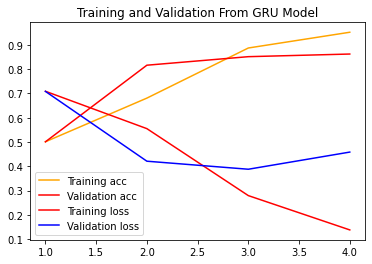

In [40]:
# Visualize accuracy and loss for train and validation data
gru_acc = model_gru_hist.history['accuracy']
gru_val_acc = model_gru_hist.history['val_accuracy']
gru_loss = model_gru_hist.history['loss']
gru_val_loss = model_gru_hist.history['val_loss']
gru_epochs = range(1, len(gru_acc) + 1)

plt.plot(gru_epochs, gru_acc, 'orange', label='Training acc')
plt.plot(gru_epochs, gru_val_acc, 'red', label='Validation acc')
plt.plot(gru_epochs, gru_loss, 'red', label='Training loss')
plt.plot(gru_epochs, gru_val_loss, 'blue', label='Validation loss')
plt.title('Training and Validation From GRU Model')
plt.legend()
plt.show()

Berdasarkan hasil grafik diatas dapat diketahui bahwa pada model GRU terjadi vanishing gradien diawal namun setelah melalui epoch diatas 3 problem tersebut hilang, akan tetapi model GRU mengalami underfit namun memberikan hasil akurasi yang cukup baik

In [41]:
# Function for Convert Predict into 0 or 1
def result_norm(data):
    data = list(data.flatten())
    for idx in range(len(data)):
        if data[idx] >= 0.5:
            data[idx] = 1
        else:
            data[idx] = 0
    return data

y_train_pred = model_gru.predict(X_train)
y_test_pred = model_gru.predict(X_test)

# Classification Repport
print('Classification Report From GRU Model')
print('Train-Set')
print(classification_report(result_norm(y_train_pred), y_train))
print('Test-Set')
print(classification_report(result_norm(y_test_pred), y_test))

311/311 [==============================] - 52s 166ms/step
Classification Report From GRU Model
Train-Set
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11126
           1       0.98      0.98      0.98     11215

    accuracy                           0.98     22341
   macro avg       0.98      0.98      0.98     22341
weighted avg       0.98      0.98      0.98     22341

Test-Set
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      4955
           1       0.87      0.86      0.87      4975

    accuracy                           0.87      9930
   macro avg       0.87      0.87      0.87      9930
weighted avg       0.87      0.87      0.87      9930



Berdasarkan hasil classification report dapat diketahui bahwa model dapat memprediksi dengan cukup baik untuk dua label yang diberikan, namun model tetap mengalami underfit, hal ini dapat disebabkan oleh banyaknya vocab dan tidak melakukan pembersihan lebih mendalam

# 9. Model Saving

In [42]:
# Save Model, Data Preparation Pipeline, List Used Columns, Numerical Columns, and Categorical Columns on Folder deployment
model = model_gru.save("deployment/nlp_model.h5py")
with open("deployment/list_stopwords.txt", "w") as num_col:
  num_col.write(str(stopwords_en))
data_inference.to_csv('movie_inference.csv')

INFO:tensorflow:Assets written to: deployment/nlp_model.h5py\assets


INFO:tensorflow:Assets written to: deployment/nlp_model.h5py\assets


Melakukan penyimpanan model dan penyimpanan stopwords yang digunakan agar dapat dilakukan untuk model deployment

# 10.Model Inference

## 10.1. Load Model

In [43]:
# Load Model
predictor = tf.keras.models.load_model("deployment/nlp_model.h5py")

## 10.2. Inferencing

In [44]:
# Display `data_inference`
data_inference

,text,label
0,*WARNING* Spoilers ahead... The writers of thi...,1
1,Let me break down this film for you...<br /><b...,0
2,This Movie Is Excellent The passion between Ja...,1
3,"The jokes are obvious, the gags are corny, and...",1
4,"This film, once sensational for its forward-th...",0


In [45]:
# Store Processed Text Into Inference Dataframe 
data_inference['text_processed'] = data_inference.text.apply(lambda x: document_processing(x))
data_inference

,text,label,text_processed
0,*WARNING* Spoilers ahead... The writers of thi...,1,warning spoilers ahead writers story knew men ...
1,Let me break down this film for you...<br /><b...,0,let break film first fifteen minutes showcase ...
2,This Movie Is Excellent The passion between Ja...,1,movie excellent passion jade billy memorable a...
3,"The jokes are obvious, the gags are corny, and...",1,jokes obvious gags corny characters walking ch...
4,"This film, once sensational for its forward-th...",0,film sensational forwardthinking politics depi...


Melakukan pemrosesan kalimat sebelum melakukan proses prediksi dengan model

In [46]:
# Predict Inference Data and Store into DataFrame
y_inf_pred = model_gru.predict(data_inference.text_processed)
data_inference['predict']=result_norm(y_inf_pred)
data_inference[['text','label','predict']]

1/1 [==============================] - 0s 338ms/step


,text,label,predict
0,*WARNING* Spoilers ahead... The writers of thi...,1,1
1,Let me break down this film for you...<br /><b...,0,0
2,This Movie Is Excellent The passion between Ja...,1,1
3,"The jokes are obvious, the gags are corny, and...",1,1
4,"This film, once sensational for its forward-th...",0,0


Berdasarkan hasil prediksi diatas menggunakan data baru, dapat disimpulkan bahwa masih terjadinya sebuah miss classification, namun model dapat mengeluarkan hasil prediksi yang cukup akurat

# 10. Pengambilan Kesimpulan

Berdasarkan EDA:
- Terdapat `40000` entri data review dan terdapat `2` kolom
- Tidak ada `Missing Values` dan `Data Type` sudah sesuai namun terdapat `277` baris data yang merupakan duplicate values
- Jumlah review yang berlabelkan positif dan negatif dapat dinyatakan seimbang, namun untuk review positif memiliki jumlah yang lebih banyak dibandingkan review negatif dimana jumlah review positif sebanyak `19908` (`50.12%`) dan review negatif sebanyak `19815` (`49.88%`) dengan selisih jumlah sebesar `0.24%`
- Berdasarkan WordCloud untuk seluruh review pada dataset, kata `film` dan `movie` merupakan sebuah kata yang sering disebutkan pada kalimat review pada dataset dimana dua kata tersebut memiliki makna yang sama, hal ini dikarenakan memang dataset merupakan kumpulan revew dari sebuah film. Kata `br` juga sering disebutkan, namun `br` merupakan sebuah tag untuk mendefinisikan `New Line` dimana hal ini hanya memberikan informasi bahwa terdapat tag `br` dalam bentuk text pada `dokumen`. Selain hal diatas terdapat sebuah kata yang cukup sering disebutkan dan menarik yaitu `character` dan `story`, dapat diasumsikan bahwa sebagian besar review memberikan tanggapan terhadap `character` dan `story` pada film tersebut
- Berdasarkan WordCloud untuk seluruh review positif pada dataset, beberapa kata yang menunjukan kesan positif pada review dan cukup sering disebutkan seperti `good`, `great`, `love`, `like`, `best`, dan `well`. Kata `character` dan `story` juga cukup disebutkan pada sekumpulan review positif ini, sehingga dapat diasumsikan bahwa dari segi karakter dan jalan cerita film tersebut lah yang membuat para penonton memberikan review yang positif
- Berdasarkan WordCloud untuk seluruh review negatif pada dataset, terdapat sebuah kata yang menunjukan kesan negatif pada review dan cukup sering disebutkan yaitu `bad`. Kata `character` dan `story` ternyata juga cukup disebutkan pada sekumpulan review negatif ini, sehingga dapat diasumsikan bahwa dari segi karakter dan jalan cerita film juga yang membuat para penonton memberikan review yang negatif, penyebab lain dari terdapatnya kesamaan ini dikarenakan jumlah review positif dan review negatif yang cukup seimbang, namun dalam sekumpulan review negatif yang diberikan terdapat kata `good` sehingga dapat diasumsikan bahwa cukup banyak yang memberikan kritikan dan review negatif terhadap film tersebut, namun tetap memberikan hal baik yang terdapat pada film tersebut.

Berdasarkan Data Preprocessing:
- Terdapat tag `<br />` atau newline pada text
- Terdapat kata `zzz` pada text sehingga perlu untuk dihandle
- Jumlah vocab terbanyak adalah `1428` dan paling sedikit `3`

Kesimpulan berdasarkan Model yang dibangun:
- Pada model GRU, model juga mengalami underfit, namun model GRU pada epoch dibawah 6 menunjukan hasil yang lebih baik dimana model tidak terlalu underfit dan memiliki akurasi yang baik juga
- Pada model GRU terjadi vanishing gradien diawal namun setelah melalui epoch diatas 3 problem tersebut hilang, akan tetapi model GRU mengalami underfit namun memberikan hasil akurasi yang cukup baik sehingga diputuskan untuk menggunakan model GRU dalam evaluasi lebih lanjut
- Berdasarkan hasil classification report dapat diketahui bahwa model dapat memprediksi dengan cukup baik untuk dua label yang diberikan, namun model tetap mengalami underfit, hal ini dapat disebabkan oleh banyaknya vocab dan tidak melakukan pembersihan lebih mendalam

Beberapa alasan yang mungkin menjadi penyebab model yang dibangun perlu dikembangkan lagi untuk diimplementasikan:
- Kurang melakukan processing data text secara mendalam
- Masih terdapat beberapa kata yang tergabung tanpa spasi
- Tidak melakukan handling untuk kata singkatan
- Keterbatasan memori sehingga tidak dapat melakukan tuning secara bebas pada neuron dan hidden layer

Saran:
- Melakukan processing data lebih mendalam
- Menggunakan stopwords yang lebih lengkap
- Menggunakan Cloud untuk proses training